In [26]:
!pip install tensorflow
!pip install matplotlib
!pip install pandas
!pip install scipy

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [28]:
img_size = (48,48)
batch_size = 64

In [29]:
train_dir = "train"
val_dir = "validation"

# EDA

In [30]:
train_agm = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)
val_agm = ImageDataGenerator(rescale=1./255)

train_ds = train_agm.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

val_ds = val_agm.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [31]:
class_name = list(train_ds.class_indices.keys())
print(class_name)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [32]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 48, 48, 1)
(64, 7)


In [33]:
class_names = list(train_ds.class_indices.keys())
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

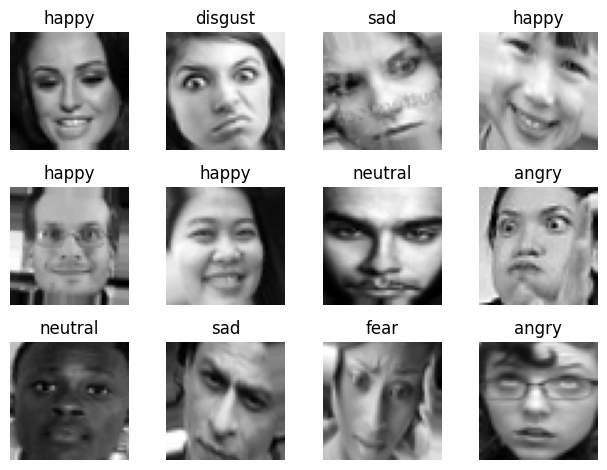

In [34]:
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].reshape(48,48), cmap='gray')
    plt.title(class_names[np.argmax(labels_batch[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Create CNN model

In [35]:
num_classes = len(class_names)
num_classes

7

In [36]:
model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [37]:
# tf.config.list_physical_devices('GPU')

# Model Training

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)

history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=20,
        callbacks=[early_stopping, reduce_lr]
    )
model.evaluate(val_ds)

Epoch 1/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.3729 - loss: 1.6432 - val_accuracy: 0.4427 - val_loss: 1.4799 - learning_rate: 0.0010
Epoch 2/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.4380 - loss: 1.4775 - val_accuracy: 0.3715 - val_loss: 1.6475 - learning_rate: 0.0010
Epoch 3/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.4788 - loss: 1.3785 - val_accuracy: 0.4857 - val_loss: 1.3945 - learning_rate: 0.0010
Epoch 4/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.4874 - loss: 1.3388 - val_accuracy: 0.4945 - val_loss: 1.3280 - learning_rate: 0.0010
Epoch 5/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.5067 - loss: 1.2969 - val_accuracy: 0.5372 - val_loss: 1.2521 - learning_rate: 0.0010
Epoch 6/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5099 - loss: 1.2680 - val_accuracy: 0.5115 - val_loss: 1.2926 - learning_rate: 0.0010
Epoch 7/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.5241 - l

[0.9952787756919861, 0.6316161751747131]

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install numpy

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# 6. Evaluation - Classification Report & Confusion Matrix
val_images, val_labels = next(val_ds)
predictions = model.predict(val_images)
y_true = np.argmax(val_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
              precision    recall  f1-score   support

       angry       0.40      0.80      0.53         5
     disgust       0.00      0.00      0.00         1
        fear       0.50      0.33      0.40        12
       happy       0.93      0.93      0.93        14
     neutral       0.73      0.73      0.73        15
         sad       0.50      0.46      0.48        13
    surprise       0.60      0.75      0.67         4

    accuracy                           0.64        64
   macro avg       0.52      0.57      0.53        64
weighted avg       0.64      0.64      0.63        64



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
